In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [15]:
fp_pca = "../results/PCAdata/"
def plot_main(anet,figname):
    mysets = [f"{anet}__hs_mm__AllOnes__adj.tsv",
              f"{anet}__hs_mm__AllOnes__emb.tsv",
              f"{anet}__ce_dm_dr_hs_mm_sc__AllOnes__emb.tsv",
              f"{anet}__hs_mm__SummedDegree-0.50__adj.tsv",
              f"{anet}__hs_mm__SummedDegree-0.50__emb.tsv",
              f"{anet}__ce_dm_dr_hs_mm_sc__SummedDegree-0.50__emb.tsv"]
    mytitles = ["Human-Mouse AdjMat Ones",
                "Human-Mouse Emb Ones",
                "All-Species Emb Ones",
                "Human-Mouse AdjMat Degrees",
                "Human-Mouse Emb Degrees",
                "All-Species Emb Degrees"]
    fig, ax = plt.subplots(2,3,figsize=(12,6))
    axs = ax.ravel()
    for idx1, aset in enumerate(mysets):
        df = pd.read_csv(fp_pca+aset,sep="\t")
        df = df.sample(frac=1)
        df = df.replace({'Label': {"hs": "human", "mm": "mouse", "dr": "fish",
                                   "dm": "fly", "ce": "worm", "sc": "yeast"}})
        mypalette=["#1B9E77", "#D95F02", "#7570B3", "#E7298A","#66A61E", "#A6761D"]
        # mypalette=["red","plum","royalblue","lime","darkorange","aqua"]
        sns.scatterplot(data=df,x="Dim1",y="Dim2",hue="Label",ax=axs[idx1],s=5,
                        palette=mypalette,
                        hue_order=["human","mouse","fish","fly","worm","yeast"],
                        alpha=1)
        axs[idx1].set_title(mytitles[idx1])
        if idx1 == 5:
            pass
        else:    
            axs[idx1].get_legend().remove()
        if idx1 in [1,2,4,5]:
            axs[idx1].set_ylabel("")
        else:
            axs[idx1].set_ylabel("PCA-2")
        if idx1 in [0,1,2]:
            axs[idx1].set_xlabel("")
        else:
            axs[idx1].set_xlabel("PCA-1")
    axs[5].legend(ncol=7,loc="center",bbox_to_anchor=(-0.8,-0.4),frameon=False)
    plt.subplots_adjust(bottom=0.2,hspace=0.3,wspace=0.2)
    fig.savefig(f'../figures/{figname}')

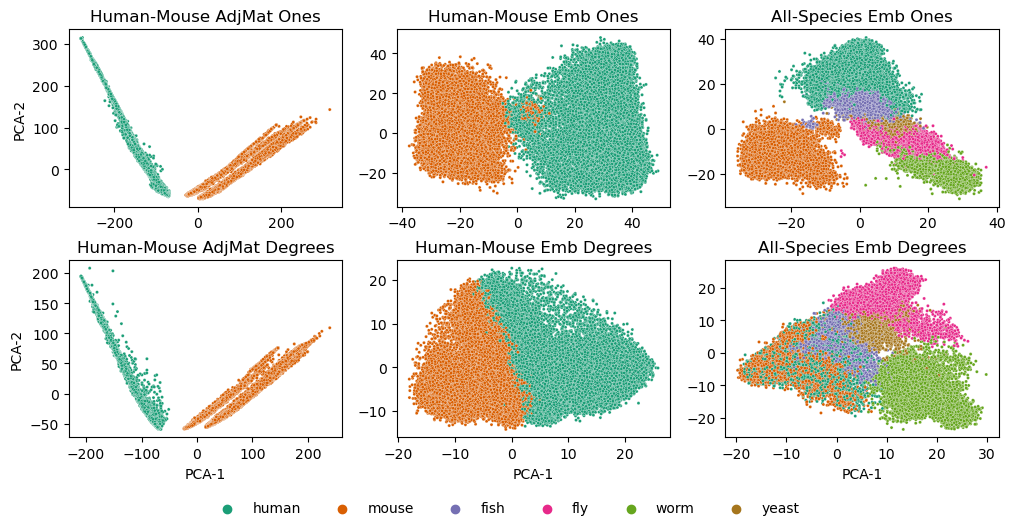

In [16]:
plot_main("IMP","Fig6.pdf")

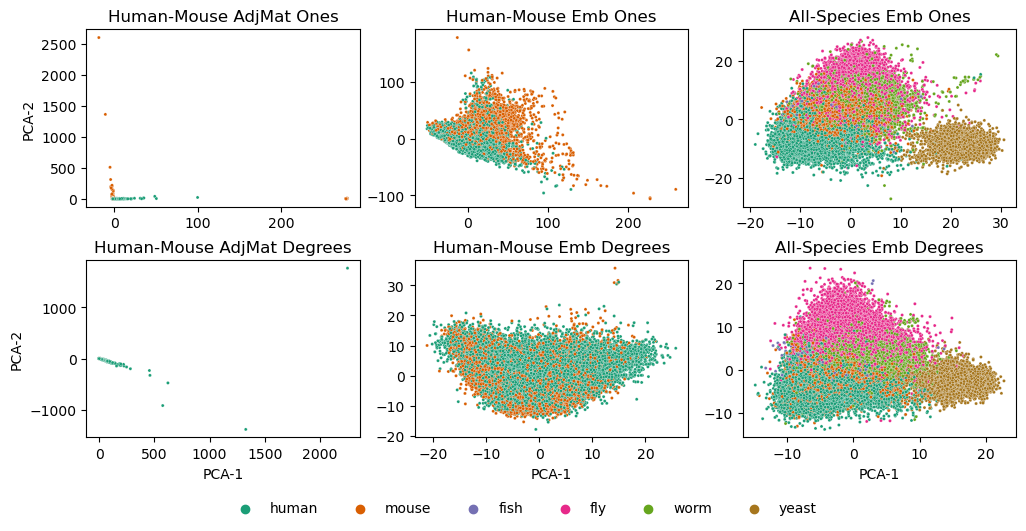

In [17]:
plot_main("BioGRID","FigSM22.pdf")

In [22]:
fp_pca = "../results/PCAdata/"
def plot_SM(anet,figname):
    mypalette=["#1B9E77", "#7570B3", "#E7298A","#66A61E", "#A6761D"]
    myorder = ["human","fish","fly","worm","yeast"]
    mysets = [f"{anet}__dr_hs__AllOnes__adj.tsv",
              f"{anet}__dm_hs__AllOnes__adj.tsv",
              f"{anet}__ce_hs__AllOnes__adj.tsv",
              f"{anet}__hs_sc__AllOnes__adj.tsv",
              f"{anet}__dr_hs__SummedDegree-0.50__emb.tsv",
              f"{anet}__dm_hs__SummedDegree-0.50__emb.tsv",
              f"{anet}__ce_hs__SummedDegree-0.50__emb.tsv",
              f"{anet}__hs_sc__SummedDegree-0.50__emb.tsv",]
    mytitles = ["Human-Fish\nAdjMat Ones",
                "Human-Fly\nAdjMat Ones",
                "Human-Worm\nAdjMat Ones",
                "Human-Yeast\nAdjMat Ones",
                "Human-Fish\nEmb Degrees",
                "Human-Fly\nEmb Degrees",
                "Human-Worm\nEmb Degrees",
                "Human-Yeast\nEmb Degrees"]
    fig, ax = plt.subplots(2,4,figsize=(12,7))
    axs = ax.ravel()
    for idx1, aset in enumerate(mysets):
        df = pd.read_csv(fp_pca+aset,sep="\t")
        df = df.sample(frac=1)
        df = df.replace({'Label': {"hs": "human", "mm": "mouse", "dr": "fish",
                           "dm": "fly", "ce": "worm", "sc": "yeast"}})
        # mypalette=["red","plum","royalblue","lime","darkorange","aqua"]
        sns.scatterplot(data=df,x="Dim1",y="Dim2",hue="Label",ax=axs[idx1],s=5,
                        palette=mypalette,
                        hue_order=myorder,
                        alpha=1)
        axs[idx1].set_title(mytitles[idx1])
        if idx1 <= 3:
            axs[idx1].set_xlabel("")
        else:
            axs[idx1].set_xlabel("PCA-1")
        if idx1 == 7:
            pass
        else:    
            axs[idx1].get_legend().remove()
        if idx1 in [1,2,3,5,6,7]:
            axs[idx1].set_ylabel("")
        else:
            axs[idx1].set_ylabel("PCA-2")
    axs[7].legend(ncol=7,loc="center",bbox_to_anchor=(-1.4,-0.3),frameon=False)
    plt.subplots_adjust(bottom=0.13,hspace=0.4,wspace=0.2,top=0.93,right=0.97,left=0.08)
    fig.savefig(f'../figures/{figname}')

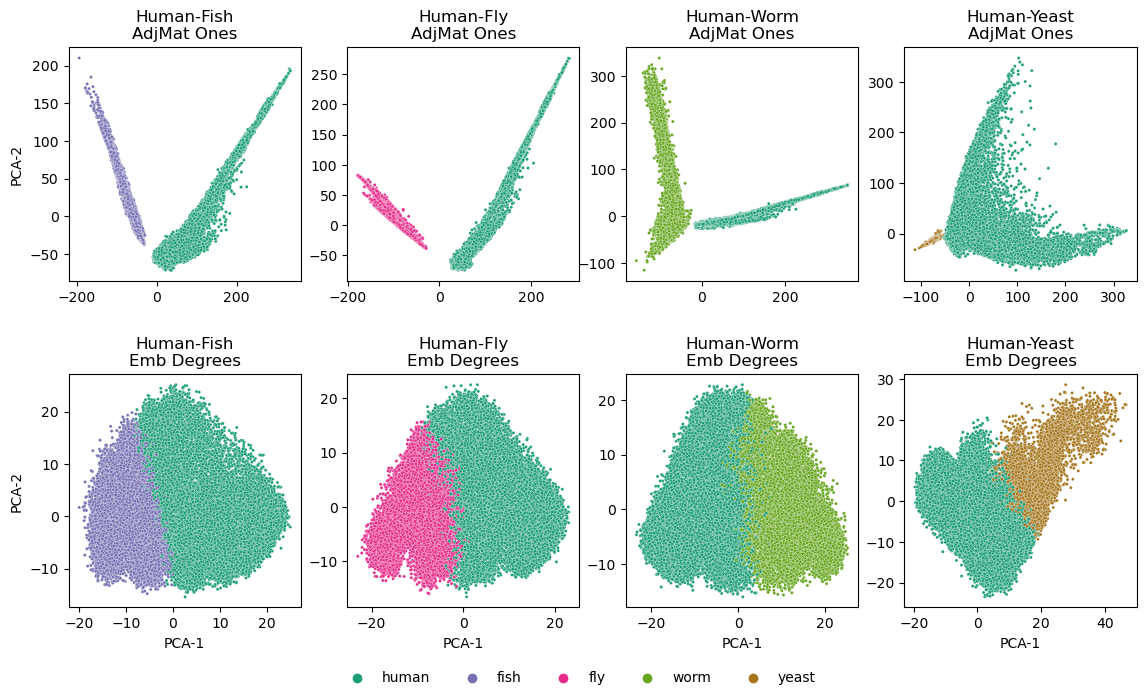

In [23]:
plot_SM("IMP","FigSM23.pdf")

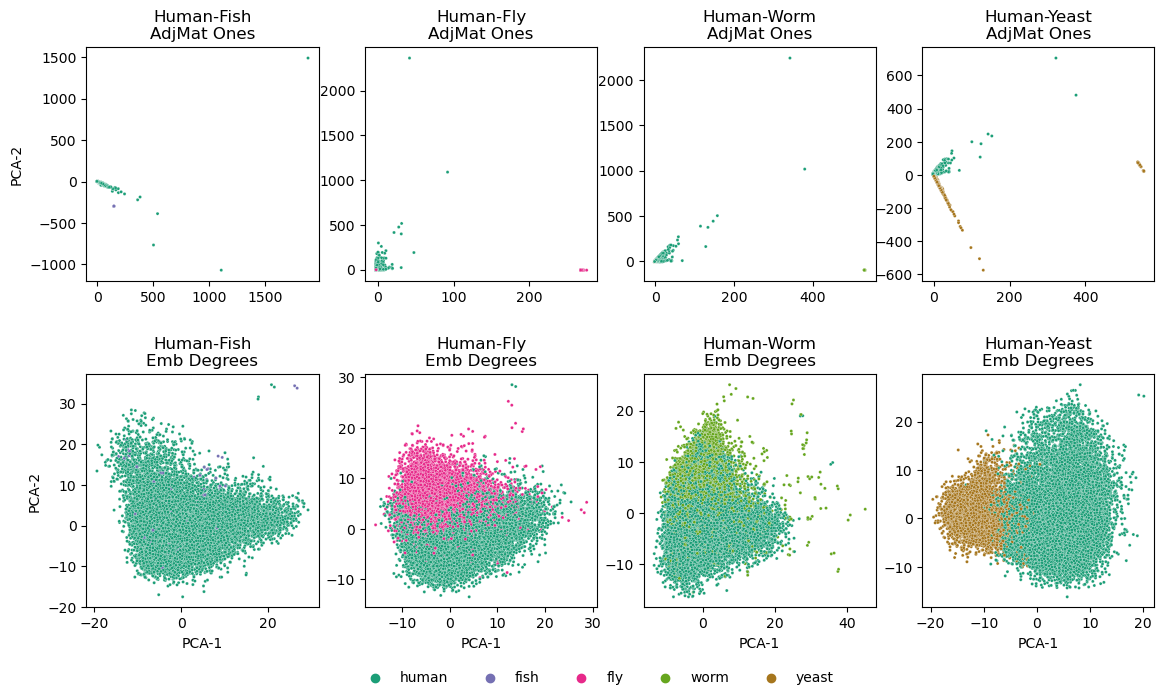

In [24]:
plot_SM("BioGRID","FigSM24.pdf")